In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

import tensorflow as tf

tfk = tf.keras
tfkl = tf.keras.layers

In [2]:
file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C37.csv'

df_test = pd.read_csv(file, nrows=100)
float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float16 for c in float_cols}

df = pd.read_csv(file, dtype=float32_cols, engine='c')
df['id'] = df.id.astype('int32')
df = df.dropna()

In [3]:
len(df)

13204962

In [4]:
sources = df[['id', 'plane_id', 'split', 'date_diff', 'before_after']].drop_duplicates()
sources.loc[: , ['split', 'before_after', 'id']].groupby(['split', 'before_after']).count()

id
split before_after     
0     0             318
      1             224
1     0             246
      1             171
2     0             323
      1             252
3     0             256
      1             162
4     0             270
      1             167

In [5]:
df_visual= df.head(100000).drop(['id','plane_id','split','date_diff','before_after'],axis=1)

<AxesSubplot:>

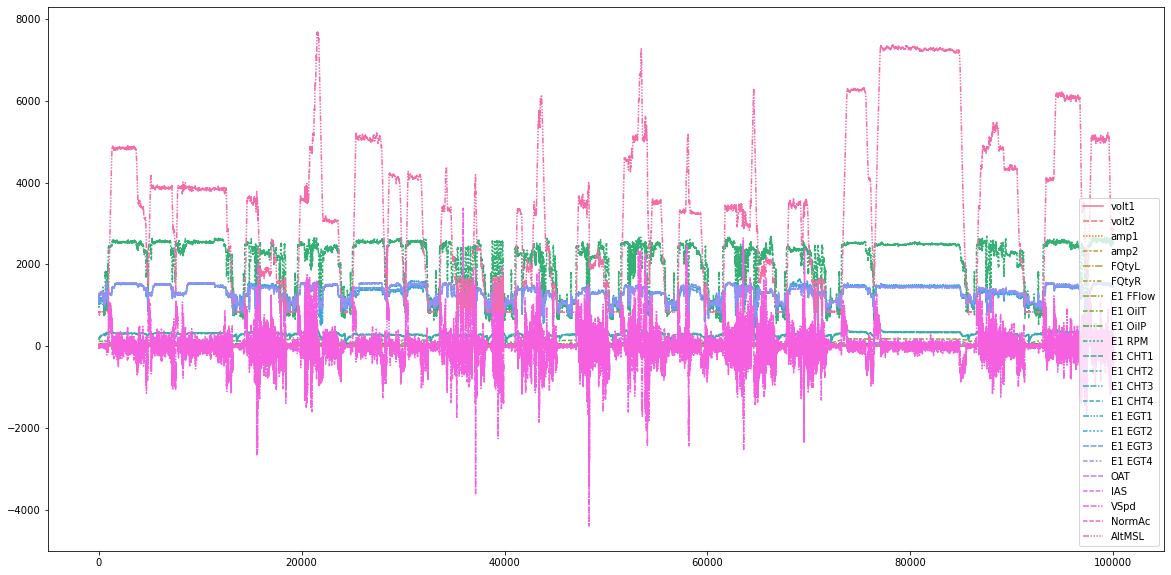

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_visual)

In [7]:
input_columns = ['volt1',
 'volt2',
 'amp1',
 'amp2',
 'FQtyL',
 'FQtyR',
 'E1 FFlow',
 'E1 OilT',
 'E1 OilP',
 'E1 RPM',
 'E1 CHT1',
 'E1 CHT2',
 'E1 CHT3',
 'E1 CHT4',
 'E1 EGT1',
 'E1 EGT2',
 'E1 EGT3',
 'E1 EGT4',
 'OAT',
 'IAS',
 'VSpd',
 'NormAc',
 'AltMSL']

array([[<AxesSubplot:title={'center':'volt1'}>,
        <AxesSubplot:title={'center':'volt2'}>,
        <AxesSubplot:title={'center':'amp1'}>,
        <AxesSubplot:title={'center':'amp2'}>,
        <AxesSubplot:title={'center':'FQtyL'}>],
       [<AxesSubplot:title={'center':'FQtyR'}>,
        <AxesSubplot:title={'center':'E1 FFlow'}>,
        <AxesSubplot:title={'center':'E1 OilT'}>,
        <AxesSubplot:title={'center':'E1 OilP'}>,
        <AxesSubplot:title={'center':'E1 RPM'}>],
       [<AxesSubplot:title={'center':'E1 CHT1'}>,
        <AxesSubplot:title={'center':'E1 CHT2'}>,
        <AxesSubplot:title={'center':'E1 CHT3'}>,
        <AxesSubplot:title={'center':'E1 CHT4'}>,
        <AxesSubplot:title={'center':'E1 EGT1'}>],
       [<AxesSubplot:title={'center':'E1 EGT2'}>,
        <AxesSubplot:title={'center':'E1 EGT3'}>,
        <AxesSubplot:title={'center':'E1 EGT4'}>,
        <AxesSubplot:title={'center':'OAT'}>,
        <AxesSubplot:title={'center':'IAS'}>],
       [<AxesSubpl

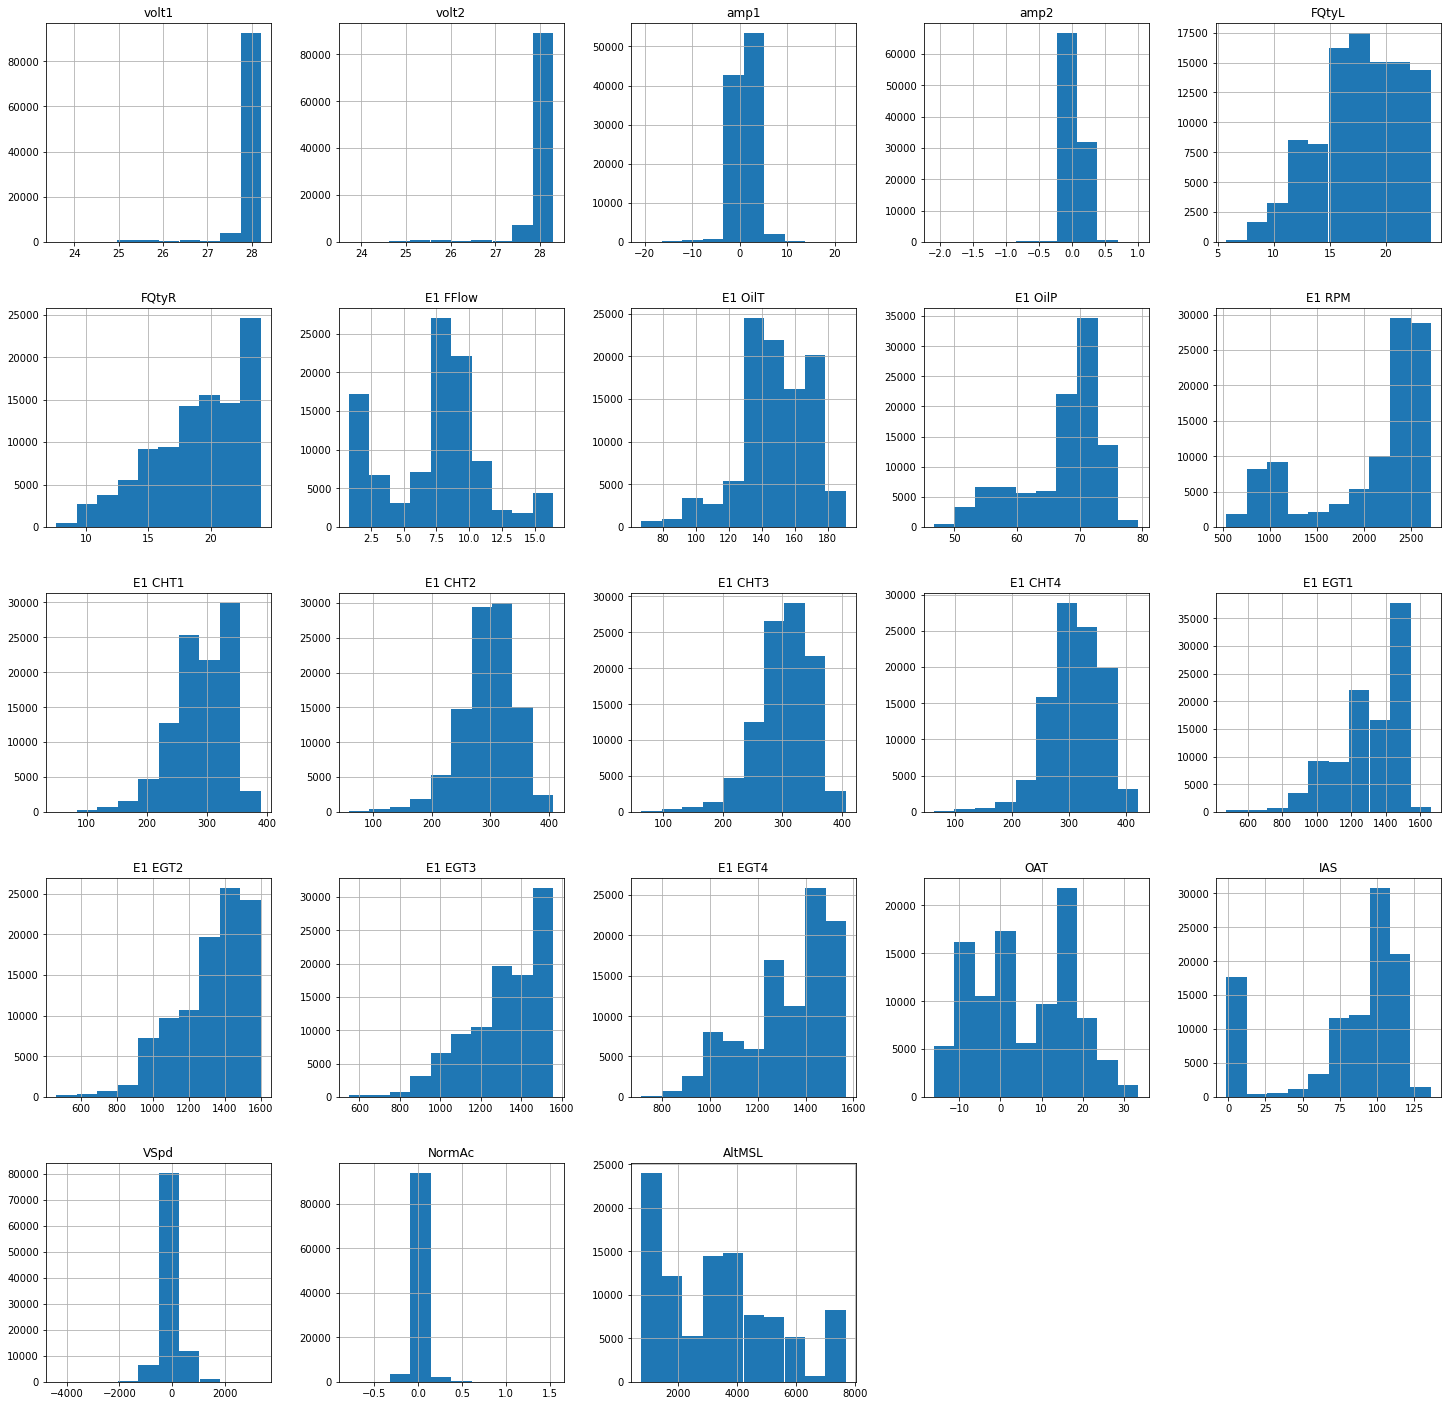

In [8]:
df_visual.hist(figsize = (25,25),column=input_columns)

In [9]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100014
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   volt1     100000 non-null  float16
 1   volt2     100000 non-null  float16
 2   amp1      100000 non-null  float16
 3   amp2      100000 non-null  float16
 4   FQtyL     100000 non-null  float16
 5   FQtyR     100000 non-null  float16
 6   E1 FFlow  100000 non-null  float16
 7   E1 OilT   100000 non-null  float16
 8   E1 OilP   100000 non-null  float16
 9   E1 RPM    100000 non-null  float16
 10  E1 CHT1   100000 non-null  float16
 11  E1 CHT2   100000 non-null  float16
 12  E1 CHT3   100000 non-null  float16
 13  E1 CHT4   100000 non-null  float16
 14  E1 EGT1   100000 non-null  float16
 15  E1 EGT2   100000 non-null  float16
 16  E1 EGT3   100000 non-null  float16
 17  E1 EGT4   100000 non-null  float16
 18  OAT       100000 non-null  float16
 19  IAS       100000 non-null  float16
 20  VSpd

In [10]:
df_visual.head(10)

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
0,27.90625,27.90625,7.898438,0.700195,24.0,24.0,2.089844,129.250,61.15625,1191.0,...,181.750,1081.0,1156.0,1112.0,1255.0,7.199219,0.0,15.742188,-0.020004,822.5
1,27.90625,27.90625,7.898438,0.600098,24.0,24.0,2.130859,129.250,61.18750,1192.0,...,181.875,1082.0,1158.0,1114.0,1257.0,7.199219,0.0,11.132812,-0.000000,822.5
3,27.90625,27.90625,7.800781,0.600098,24.0,24.0,2.119141,129.250,61.15625,1190.0,...,182.750,1094.0,1173.0,1125.0,1267.0,7.199219,0.0,-30.640625,-0.029999,824.5
4,27.90625,27.90625,7.699219,0.600098,24.0,24.0,2.080078,129.125,61.25000,1197.0,...,183.125,1098.0,1178.0,1129.0,1271.0,7.199219,0.0,-23.953125,-0.020004,825.0
5,27.90625,27.90625,7.601562,0.600098,24.0,24.0,2.060547,129.125,61.12500,1190.0,...,183.500,1101.0,1183.0,1133.0,1277.0,7.000000,0.0,-6.941406,-0.010002,824.5
6,27.90625,27.90625,7.800781,0.600098,24.0,24.0,2.119141,129.000,61.09375,1185.0,...,184.000,1105.0,1190.0,1138.0,1282.0,7.000000,0.0,-19.156250,0.010002,824.0
7,27.90625,28.00000,7.800781,0.600098,24.0,24.0,2.060547,129.000,60.90625,1176.0,...,184.375,1109.0,1196.0,1141.0,1287.0,7.000000,0.0,-56.156250,-0.029999,824.0
8,27.90625,27.90625,7.699219,0.600098,24.0,24.0,2.070312,129.000,61.00000,1178.0,...,184.750,1112.0,1204.0,1145.0,1295.0,7.000000,0.0,-19.406250,0.040009,824.5
9,27.90625,27.90625,7.500000,0.600098,24.0,24.0,2.130859,128.875,60.87500,1174.0,...,185.125,1115.0,1212.0,1150.0,1290.0,7.000000,0.0,7.628906,0.010002,824.5
10,27.90625,27.90625,7.500000,0.600098,24.0,24.0,2.039062,128.750,61.06250,1177.0,...,185.625,1118.0,1222.0,1153.0,1292.0,7.000000,0.0,-19.406250,0.020004,825.0


In [11]:
df_visual.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000,100000.00000,100000.0,...,100000.00000,100000.00,100000.00,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,NaN,NaN,NaN,0.024185,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006409,NaN
std,0.000000,0.000000,0.000000,0.100830,0.000000,0.000000,0.000000,0.000,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.070740,NaN
min,23.593750,23.703125,-20.703125,-2.099609,5.769531,7.621094,0.819824,66.750,46.71875,533.5,...,62.46875,474.75,461.25,548.0,712.0,-16.203125,-1.179688,-4396.000000,-0.790039,757.0
25%,28.000000,28.000000,0.500000,0.000000,15.210938,16.453125,4.679688,136.750,64.68750,1767.0,...,282.00000,1205.00,1218.00,1223.0,1232.0,-3.500000,70.312500,-109.562500,-0.020004,1505.0
50%,28.093750,28.093750,0.899902,0.000000,17.906250,19.562500,8.031250,146.000,69.43750,2386.0,...,312.00000,1340.00,1372.00,1351.0,1383.0,4.199219,96.562500,-0.939941,0.000000,3348.0
75%,28.093750,28.093750,1.299805,0.099976,20.968750,22.296875,9.398438,165.750,71.93750,2508.0,...,347.00000,1445.00,1486.00,1466.0,1462.0,16.203125,106.812500,82.687500,0.020004,4808.0
max,28.203125,28.296875,22.296875,1.000000,24.000000,24.000000,16.406250,191.125,79.37500,2714.0,...,422.00000,1662.00,1601.00,1558.0,1568.0,33.500000,136.000000,3374.000000,1.540039,7680.0


In [12]:
BATCH_SIZE = 32
SHAPE = (4096, 23)
BLOCK_SHAPE = (128, 23)
EPOCHS = 30
VARIABLES = 23
NFOLD = 5 
STEPS_PER_EPOCH = 200

In [13]:
preprocess = preprocessing.MinMaxScaler()
preprocess.fit(df.loc[:, input_columns].sample(100000, random_state = 0 ))
org_value = df.loc[:, input_columns].values
res = preprocess.transform(org_value)
for i, col in enumerate(input_columns):
    df.loc[:, col] = res[:, i]

C:\Users\47008\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
def get_dataset(df): 

    ids = df.id.unique()

    sensor_datas = []
    afters = [] 

    for id in ids: 
        sensor_data = df[df.id == id].iloc[-SHAPE[0]:, :23].values

        sensor_data = np.pad(sensor_data, [[0, SHAPE[0]- len(sensor_data)], [0,0]])

        sensor_data = tf.convert_to_tensor(sensor_data, dtype = tf.float32) 

        after = df[df.id == id]['before_after'].iloc[0]

        sensor_datas.append(sensor_data)
        afters.append(after)


    sensor_datas = tf.stack(sensor_datas)
    afters = np.stack(afters)

    ds = tf.data.Dataset.from_tensor_slices( (sensor_datas, afters))
    
    return ds

In [15]:
def slice_random(x, y):
    start = tf.random.uniform(shape=[], minval=0, maxval=4096-BLOCK_SHAPE[0], dtype=tf.int64)
    x = x[start: start + BLOCK_SHAPE[0]]
    x = tf.reshape(x, (BLOCK_SHAPE))
    return x, y 

In [16]:
def fix_type(x, y):

    return tf.cast(x, tf.float32), tf.cast(y, tf.float32)

In [17]:
def prepare_for_training(ds, shuffle = False, repeat = False, predict= True):
    
    ds = ds.map(fix_type)
    ds = ds.map(slice_random)

    ds = ds.shuffle(512) if shuffle else ds 
    ds = ds.repeat() if repeat else ds 
    ds = ds.batch(BATCH_SIZE, drop_remainder=True)

    if not predict: 
        ds = ds.map(lambda x, y : (x, x) ) 
    else: 
        ds = ds.map(lambda x, y : (x, tf.reshape(y, (-1, 1))) )
         
    return ds

In [18]:
def get_train_and_val_for_fold(folded_datasets, fold):
    predict = True

    train = []
    for i in range(NFOLD-1): 
        if i == fold:
            val_ds = folded_datasets[i][0].concatenate(folded_datasets[i][1])
        else: 
            train.append(folded_datasets[i][0])
    
    test_ds = folded_datasets[4][0].concatenate(folded_datasets[4][1])
    
    train_ds = None
    for ds in train: 
        train_ds = ds if train_ds is None else train_ds.concatenate(ds)

    test_ds = prepare_for_training(test_ds, shuffle=False)
    train_ds = prepare_for_training(train_ds, shuffle=True, repeat = True)
    val_ds = prepare_for_training(val_ds, shuffle=False)
    
    return train_ds, val_ds, test_ds

In [19]:
folded_datasets = []

for i in range(NFOLD):
    after = get_dataset(df[(df.split == i) & (df.before_after == 1)])
    before = get_dataset(df[(df.split == i) & (df.before_after == 0)])
    folded_datasets.append((after, before))

In [20]:
def conv_model_long(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model                      

In [21]:
def conv_model_short(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model

In [22]:
cnn_long_result = {}
for i in range(NFOLD-1):   
    model= conv_model_long()
    model.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.AUC(curve = 'PR')], 
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_long_cnn = model.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_long_result[i] = res_long_cnn.history
    
pd.DataFrame(cnn_long_result)

Epoch 1/30
200/200 [==============================] - 60s 298ms/step - loss: 0.1952 - root_mean_squared_error: 0.4418 - auc: 1.0000 - val_loss: 0.2914 - val_root_mean_squared_error: 0.5398 - val_auc: 0.4467
Epoch 2/30
200/200 [==============================] - 61s 304ms/step - loss: 0.0603 - root_mean_squared_error: 0.2456 - auc: 1.0000 - val_loss: 0.4513 - val_root_mean_squared_error: 0.6718 - val_auc: 0.4260
Epoch 3/30
200/200 [==============================] - 59s 296ms/step - loss: 0.0152 - root_mean_squared_error: 0.1234 - auc: 1.0000 - val_loss: 0.5102 - val_root_mean_squared_error: 0.7142 - val_auc: 0.4662
Epoch 4/30
200/200 [==============================] - 59s 296ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - auc: 1.0000 - val_loss: 0.5371 - val_root_mean_squared_error: 0.7329 - val_auc: 0.4475
Epoch 5/30
200/200 [==============================] - 61s 303ms/step - loss: 0.0100 - root_mean_squared_error: 0.1001 - auc: 1.0000 - val_loss: 0.5453 - val_root_mean_squar

Epoch 10/30
200/200 [==============================] - 61s 305ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761 - auc_1: 1.0000 - val_loss: 0.5747 - val_root_mean_squared_error: 0.7581 - val_auc_1: 0.4131
Epoch 11/30
200/200 [==============================] - 60s 302ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - auc_1: 1.0000 - val_loss: 0.5799 - val_root_mean_squared_error: 0.7615 - val_auc_1: 0.4114
Epoch 12/30
200/200 [==============================] - 60s 300ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - auc_1: 1.0000 - val_loss: 0.5772 - val_root_mean_squared_error: 0.7597 - val_auc_1: 0.4160
Epoch 13/30
200/200 [==============================] - 60s 298ms/step - loss: 0.0020 - root_mean_squared_error: 0.0451 - auc_1: 1.0000 - val_loss: 0.5798 - val_root_mean_squared_error: 0.7615 - val_auc_1: 0.4145
Epoch 14/30
200/200 [==============================] - 60s 299ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - auc_1: 1.0000 - val_loss: 0.581

200/200 [==============================] - 59s 293ms/step - loss: 1.2960e-04 - root_mean_squared_error: 0.0114 - auc_2: 1.0000 - val_loss: 0.5354 - val_root_mean_squared_error: 0.7317 - val_auc_2: 0.4591
Epoch 19/30
200/200 [==============================] - 61s 304ms/step - loss: 8.2592e-05 - root_mean_squared_error: 0.0091 - auc_2: 1.0000 - val_loss: 0.5356 - val_root_mean_squared_error: 0.7318 - val_auc_2: 0.4601
Epoch 20/30
200/200 [==============================] - 58s 292ms/step - loss: 6.4819e-05 - root_mean_squared_error: 0.0081 - auc_2: 1.0000 - val_loss: 0.5356 - val_root_mean_squared_error: 0.7318 - val_auc_2: 0.4610
Epoch 21/30
200/200 [==============================] - 58s 291ms/step - loss: 4.7609e-05 - root_mean_squared_error: 0.0069 - auc_2: 1.0000 - val_loss: 0.5361 - val_root_mean_squared_error: 0.7322 - val_auc_2: 0.4574
Epoch 22/30
200/200 [==============================] - 58s 291ms/step - loss: 3.8904e-05 - root_mean_squared_error: 0.0062 - auc_2: 1.0000 - val_los

200/200 [==============================] - 58s 289ms/step - loss: 1.9865e-05 - root_mean_squared_error: 0.0045 - auc_3: 1.0000 - val_loss: 0.6100 - val_root_mean_squared_error: 0.7810 - val_auc_3: 0.3788
Epoch 27/30
200/200 [==============================] - 58s 289ms/step - loss: 1.5348e-05 - root_mean_squared_error: 0.0039 - auc_3: 1.0000 - val_loss: 0.6101 - val_root_mean_squared_error: 0.7811 - val_auc_3: 0.3882
Epoch 28/30
200/200 [==============================] - 58s 290ms/step - loss: 1.1397e-05 - root_mean_squared_error: 0.0034 - auc_3: 1.0000 - val_loss: 0.6097 - val_root_mean_squared_error: 0.7809 - val_auc_3: 0.3870
Epoch 29/30
200/200 [==============================] - 58s 289ms/step - loss: 1.0950e-05 - root_mean_squared_error: 0.0033 - auc_3: 1.0000 - val_loss: 0.6101 - val_root_mean_squared_error: 0.7811 - val_auc_3: 0.3803
Epoch 30/30
200/200 [==============================] - 58s 290ms/step - loss: 8.6134e-06 - root_mean_squared_error: 0.0029 - auc_3: 1.0000 - val_los

,0,1,2,3
loss,"[0.19516098499298096, 0.06033461540937424, 0.0...","[0.22328533232212067, 0.10249552875757217, 0.0...","[0.21530364453792572, 0.07793248444795609, 0.0...","[0.20171691477298737, 0.0665174052119255, 0.01..."
root_mean_squared_error,"[0.4417702853679657, 0.24563105404376984, 0.12...","[0.4725307822227478, 0.3201492428779602, 0.145...","[0.46400824189186096, 0.2791638970375061, 0.12...","[0.4491290748119354, 0.2579096853733063, 0.125..."
auc,"[1.0, 1.0, 1.0, 1.0, 0.9999999403953552, 1.0, ...",NaN,NaN,NaN
val_loss,"[0.2913878262042999, 0.45127683877944946, 0.51...","[0.2696566879749298, 0.410346657037735, 0.5134...","[0.26817992329597473, 0.4074288010597229, 0.47...","[0.2964993715286255, 0.4744662046432495, 0.553..."
val_root_mean_squared_error,"[0.5398035049438477, 0.6717714071273804, 0.714...","[0.5192847847938538, 0.6405830383300781, 0.716...","[0.5178608894348145, 0.6383014917373657, 0.691...","[0.5445175766944885, 0.6888150572776794, 0.743..."
val_auc,"[0.4466542601585388, 0.4260198473930359, 0.466...",NaN,NaN,NaN
auc_1,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN,NaN
val_auc_1,NaN,"[0.41220057010650635, 0.38613903522491455, 0.4...",NaN,NaN
auc_2,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 0.9999999403953552, 1.0, ...",NaN
val_auc_2,NaN,NaN,"[0.4945595860481262, 0.535064697265625, 0.4677...",NaN


In [23]:
cnn_short_result = {}
for i in range(NFOLD-1):   
    model= conv_model_short()
    model.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.AUC(curve = 'PR')], 
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_short_cnn = model.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_short_result[i] = res_short_cnn.history
    
pd.DataFrame(cnn_short_result)

Epoch 1/30
200/200 [==============================] - 6s 28ms/step - loss: 0.1996 - root_mean_squared_error: 0.4468 - auc_4: 1.0000 - val_loss: 0.2689 - val_root_mean_squared_error: 0.5186 - val_auc_4: 0.3822
Epoch 2/30
200/200 [==============================] - 5s 27ms/step - loss: 0.1588 - root_mean_squared_error: 0.3985 - auc_4: 1.0000 - val_loss: 0.2879 - val_root_mean_squared_error: 0.5366 - val_auc_4: 0.4163
Epoch 3/30
200/200 [==============================] - 5s 27ms/step - loss: 0.1179 - root_mean_squared_error: 0.3434 - auc_4: 1.0000 - val_loss: 0.3163 - val_root_mean_squared_error: 0.5624 - val_auc_4: 0.3967
Epoch 4/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0823 - root_mean_squared_error: 0.2869 - auc_4: 1.0000 - val_loss: 0.3468 - val_root_mean_squared_error: 0.5889 - val_auc_4: 0.4353
Epoch 5/30
200/200 [==============================] - 5s 27ms/step - loss: 0.0577 - root_mean_squared_error: 0.2402 - auc_4: 1.0000 - val_loss: 0.3784 - val_root_me

200/200 [==============================] - 5s 26ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - auc_5: 1.0000 - val_loss: 0.4727 - val_root_mean_squared_error: 0.6876 - val_auc_5: 0.4431
Epoch 11/30
200/200 [==============================] - 5s 27ms/step - loss: 0.0187 - root_mean_squared_error: 0.1367 - auc_5: 1.0000 - val_loss: 0.4868 - val_root_mean_squared_error: 0.6977 - val_auc_5: 0.4164
Epoch 12/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - auc_5: 1.0000 - val_loss: 0.4919 - val_root_mean_squared_error: 0.7013 - val_auc_5: 0.4098
Epoch 13/30
200/200 [==============================] - 5s 27ms/step - loss: 0.0153 - root_mean_squared_error: 0.1235 - auc_5: 1.0000 - val_loss: 0.5002 - val_root_mean_squared_error: 0.7072 - val_auc_5: 0.4156
Epoch 14/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - auc_5: 1.0000 - val_loss: 0.5152 - val_root_mean_squa

200/200 [==============================] - 5s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.0968 - auc_6: 1.0000 - val_loss: 0.5192 - val_root_mean_squared_error: 0.7206 - val_auc_6: 0.4506
Epoch 20/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0087 - root_mean_squared_error: 0.0934 - auc_6: 1.0000 - val_loss: 0.5139 - val_root_mean_squared_error: 0.7169 - val_auc_6: 0.4571
Epoch 21/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0089 - root_mean_squared_error: 0.0941 - auc_6: 1.0000 - val_loss: 0.5176 - val_root_mean_squared_error: 0.7194 - val_auc_6: 0.4554
Epoch 22/30
200/200 [==============================] - 5s 27ms/step - loss: 0.0080 - root_mean_squared_error: 0.0894 - auc_6: 1.0000 - val_loss: 0.5218 - val_root_mean_squared_error: 0.7224 - val_auc_6: 0.4490
Epoch 23/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - auc_6: 1.0000 - val_loss: 0.5165 - val_root_mean_squa

200/200 [==============================] - 5s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.0837 - auc_7: 1.0000 - val_loss: 0.6031 - val_root_mean_squared_error: 0.7766 - val_auc_7: 0.3793
Epoch 29/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - auc_7: 1.0000 - val_loss: 0.6014 - val_root_mean_squared_error: 0.7755 - val_auc_7: 0.3843
Epoch 30/30
200/200 [==============================] - 5s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.0849 - auc_7: 1.0000 - val_loss: 0.6015 - val_root_mean_squared_error: 0.7756 - val_auc_7: 0.3825


,0,1,2,3
loss,"[0.1996079832315445, 0.15883219242095947, 0.11...","[0.33654290437698364, 0.28127333521842957, 0.2...","[0.2462993562221527, 0.19834491610527039, 0.14...","[0.2215571403503418, 0.17976579070091248, 0.13..."
root_mean_squared_error,"[0.44677507877349854, 0.3985375761985779, 0.34...","[0.5801231861114502, 0.5303521156311035, 0.476...","[0.4962855577468872, 0.44535931944847107, 0.38...","[0.4706985652446747, 0.4239879548549652, 0.367..."
auc_4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN,NaN,NaN
val_loss,"[0.2689353823661804, 0.2879267632961273, 0.316...","[0.24405011534690857, 0.24938330054283142, 0.2...","[0.2528883218765259, 0.263895720243454, 0.2854...","[0.2646755576133728, 0.28505566716194153, 0.31..."
val_root_mean_squared_error,"[0.5185897946357727, 0.5365880727767944, 0.562...","[0.49401429295539856, 0.4993829131126404, 0.51...","[0.5028800368309021, 0.5137078166007996, 0.534...","[0.5144662857055664, 0.5339060425758362, 0.561..."
val_auc_4,"[0.38223063945770264, 0.41629451513290405, 0.3...",NaN,NaN,NaN
auc_5,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN,NaN
val_auc_5,NaN,"[0.39900028705596924, 0.3971686065196991, 0.41...",NaN,NaN
auc_6,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
val_auc_6,NaN,NaN,"[0.44957810640335083, 0.4663293957710266, 0.45...",NaN


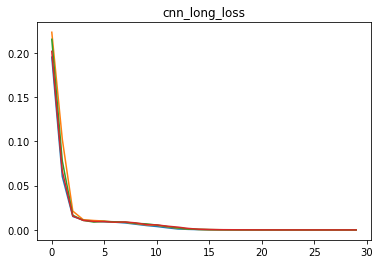

In [24]:
plt.title('cnn_long_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['loss'])

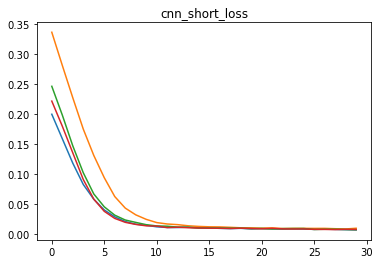

In [25]:
plt.title('cnn_short_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['loss'])

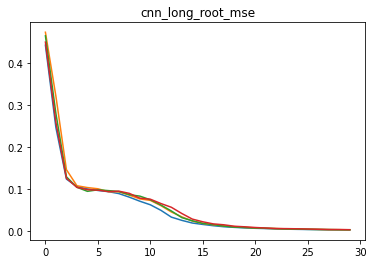

In [26]:
plt.title("cnn_long_root_mse")
for i in range(4):
    plt.plot(cnn_long_result[i]['root_mean_squared_error'])

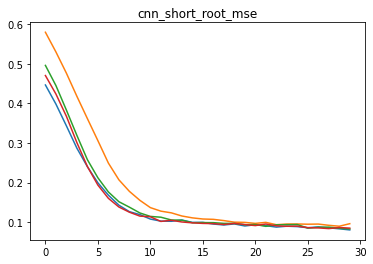

In [27]:
plt.title("cnn_short_root_mse")
for i in range(4):
    plt.plot(cnn_short_result[i]['root_mean_squared_error'])

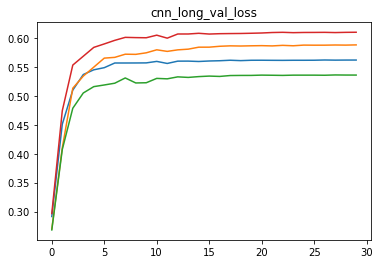

In [28]:
plt.title('cnn_long_val_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['val_loss'])

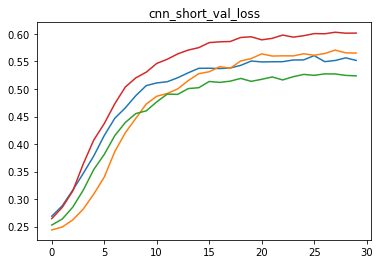

In [29]:
plt.title('cnn_short_val_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['val_loss'])

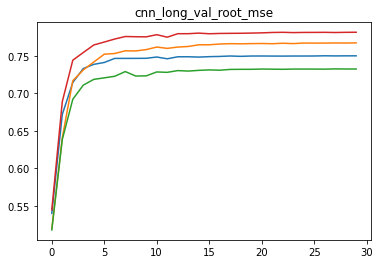

In [30]:
plt.title("cnn_long_val_root_mse")
for i in range(4):
    plt.plot(cnn_long_result[i]['val_root_mean_squared_error'])

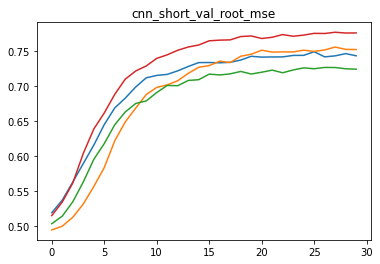

In [31]:
plt.title("cnn_short_val_root_mse")
for i in range(4):
    plt.plot(cnn_short_result[i]['val_root_mean_squared_error'])

In [32]:
for i in range(4):
    score_long = np.asarray(cnn_long_result[i]['loss'])
    loss_long_score =  np.median(score_long, axis=0)
    score_short = np.asarray(cnn_short_result[i]['loss'])
    loss_short_score = np.median(score_short, axis=0)

In [33]:
loss_long_score

0.0006302576075540856

In [34]:
loss_short_score

0.009517325088381767